In [1]:
import keras
import keras.applications.mobilenet_v2 as k_mobilenet_v2
import keras.backend as k
import keras.datasets.mnist as k_mnist
import keras.layers as k_layers
from keras.layers import Dense
import keras.losses as k_losses
import keras.models as k_models
import keras.optimizers as k_optimizers
import keras.preprocessing.image as k_image
import keras.utils as k_utils
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from math import ceil

Using TensorFlow backend.


## Funkcja rysujaca aktywacje dla konkretnej warstwy

In [2]:
def visualize_layer(layer_number, layer_name, activations):
    # przygotowanie obrazu do wyswietlenia
    _, image_y, image_x, number_of_channels = activations.shape
    number_of_columns = 10
    number_of_rows = ceil(number_of_channels / number_of_columns)
    final_image = np.zeros((image_y * number_of_rows, image_x * number_of_columns))
    
    for channel_number in range(number_of_channels):
        (row, column) = (channel_number // number_of_columns, channel_number % number_of_columns)
        channel_activation = activations[0, :, :, channel_number]
        
        # normalizacja liczb do przedzialu [0, 1]
        channel_activation -= np.min(channel_activation)
        if np.max(channel_activation) != 0:
            channel_activation /= np.max(channel_activation)
            
        # podmiana czesci obbrazu do wyswietlenia na wizualizacje aktywacji kanalu
        final_image[
            row * image_y : (row + 1) * image_y,
            column * image_x : (column + 1) * image_x
        ] = channel_activation
        
    plt.figure(figsize=(1.5 * number_of_columns, 1.5 * number_of_rows))
    plt.imshow(final_image, cmap="plasma")
    plt.title("Layer " + str(layer_number) + ": " + layer_name)
    plt.axis('off')
    plt.show()

## Funkcja wizualizująca podane wartswy

In [3]:
def visualize_channels_activations(model, preprocessed_image, layers_to_visualize):    
    print("The given network contains", len(model.layers), "layers and",model.count_params() ,"parameters\n")
        
    for layer in layers_to_visualize:
        get_activations = k.function([model.layers[0].input], [model.layers[layer].output])
        activations = get_activations([preprocessed_image])
        visualize_layer(layer, model.layers[layer].name, activations[0])

## Wczytanie modelu

In [4]:
model = k_mobilenet_v2.MobileNetV2(weights='imagenet', include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


## Wczytanie i preprocessing obrazka

In [5]:
image_path = './pictures/burger.jpg'
image = k_image.load_img(image_path, target_size=(224, 224))
preprocessed_image = k_image.img_to_array(image)  
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
preprocessed_image = k_mobilenet_v2.preprocess_input(preprocessed_image)

## Przykladowa wizualizacja

The given network contains 157 layers and 3538984 parameters



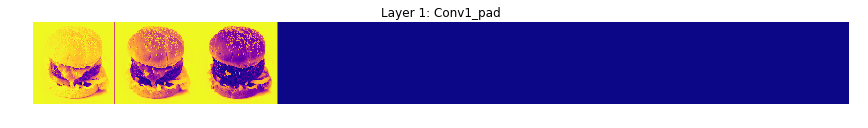

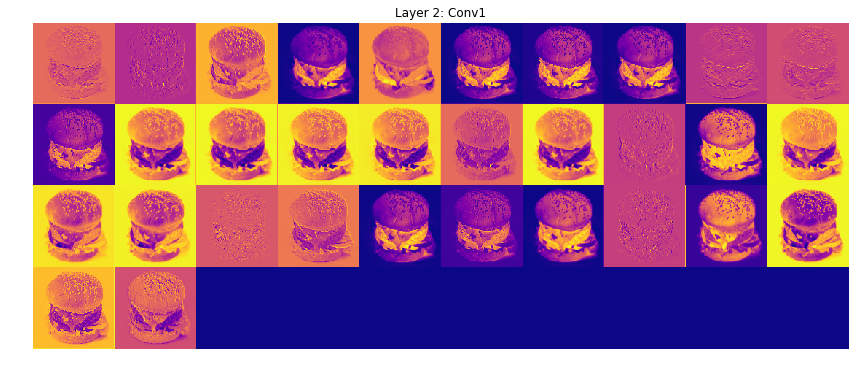

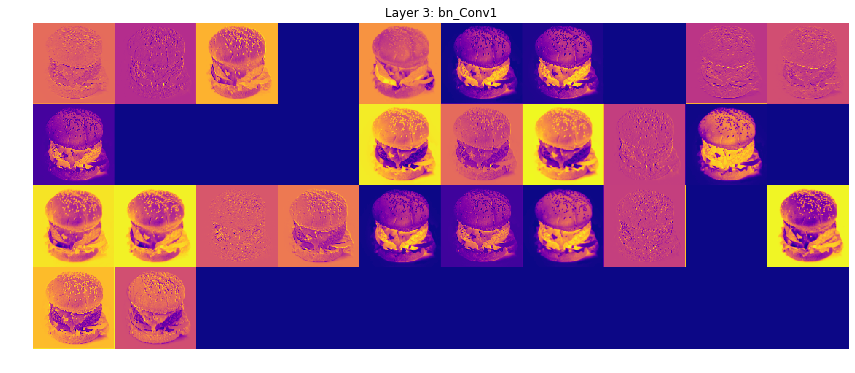

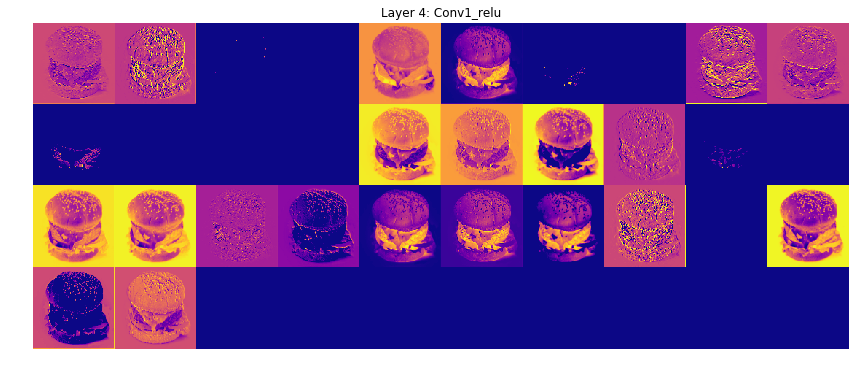

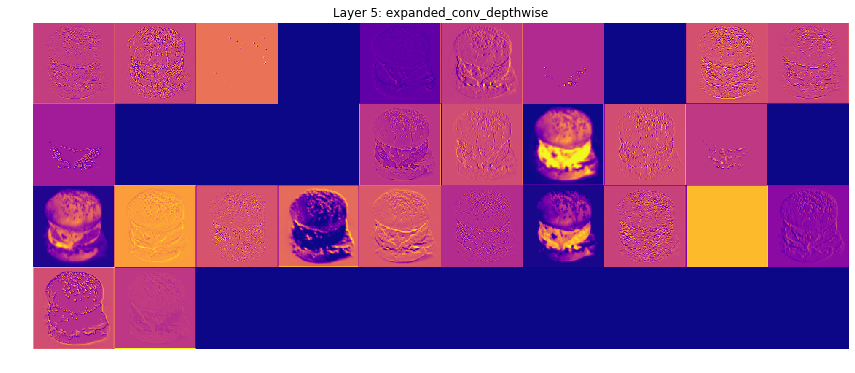

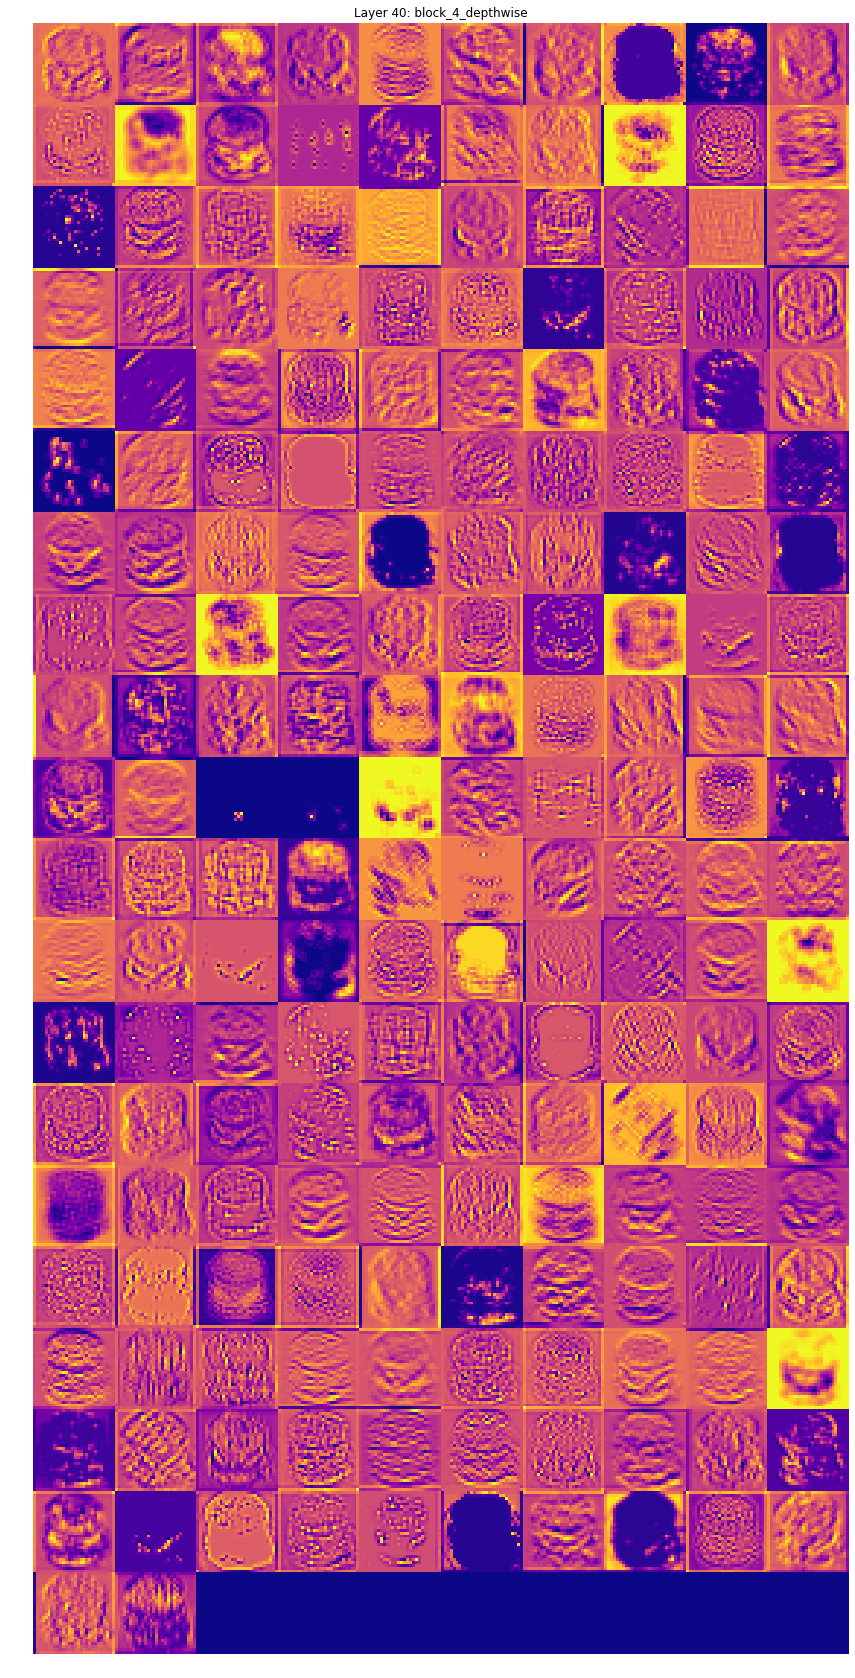

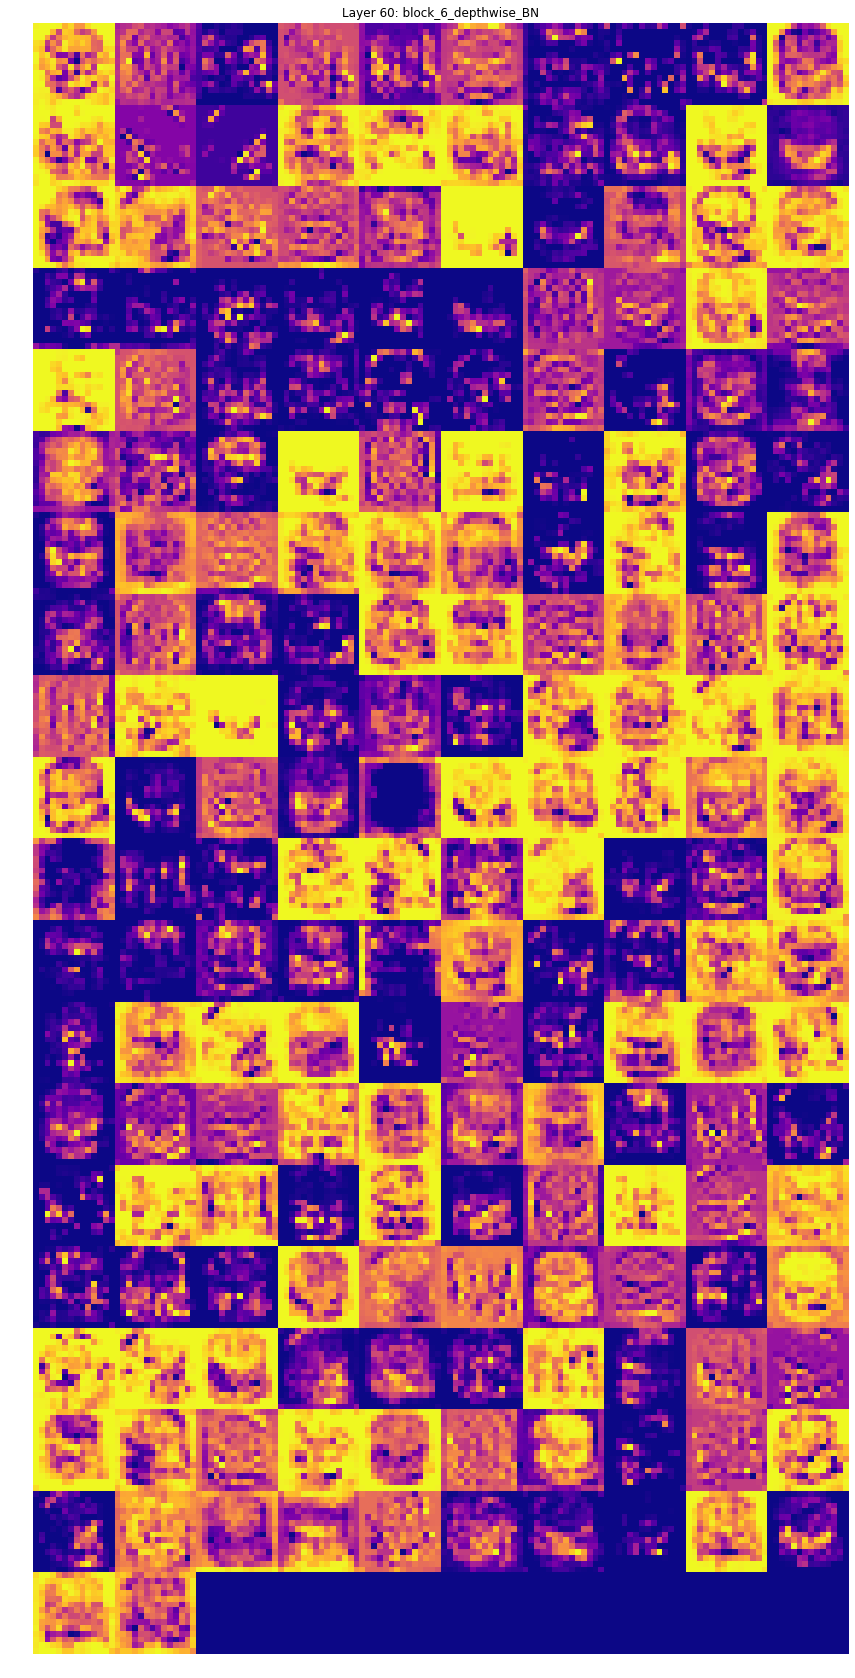

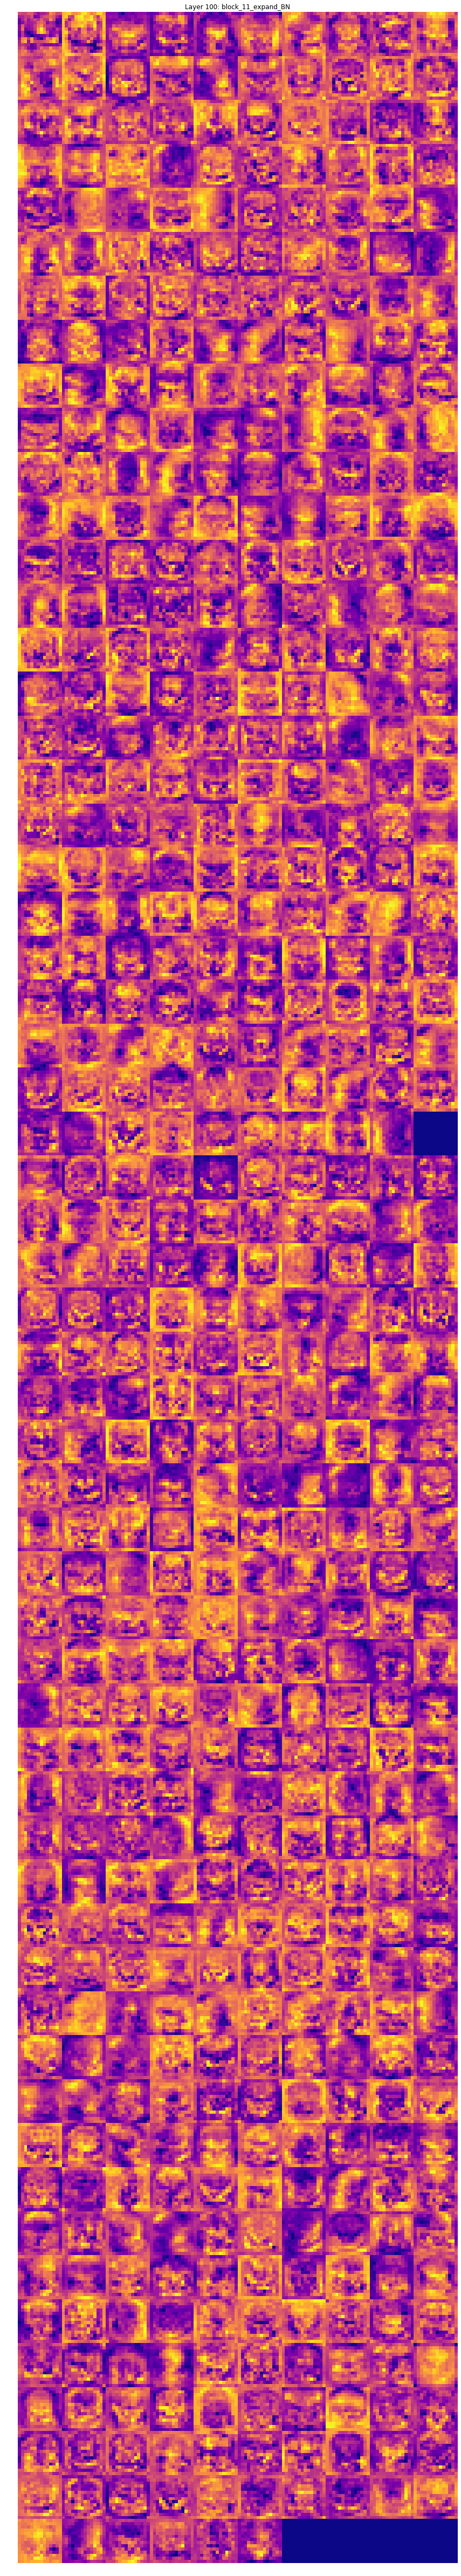

In [6]:
visualize_channels_activations(model, preprocessed_image, layers_to_visualize=[1, 2, 3, 4, 5, 40, 60, 100])